## Install dependencies

In [5]:
library(RWeka)
library(FSelector)

In [6]:
datafile <- "dataset/dataset_etapas_class17_idx.arff"
dataset <- read.arff(datafile);

In [12]:
data.columns <- names(dataset)
# we do not need NEtapa for the ranking
attr_valid <- data.columns[data.columns != "NEtapa"]
# questions excluding the class one (P17)
attr_rank <- attr_valid[attr_valid != "P17"]

# unique values for NEtapa
stages <- unique(dataset[["NEtapa"]])

# let's initialize the dataframe
results <- data.frame(question=attr_rank)

for (stage in sort(stages, decreasing = FALSE)){
    df <- dataset[dataset$NEtapa == stage, ]
    df <- df[attr_valid]
    weights <- symmetrical.uncertainty(P17~., df)
    # adding a new column for this NEtapa/stage
    results[[stage]] <- weights$attr_importance
}
# calculating rank for whole dataset
df <- dataset[attr_valid]
weights <- symmetrical.uncertainty(P17~., df)
results[["total"]] <- weights$attr_importance

# sort based on "total" column
results <-results[order(results$total, decreasing = TRUE),]

print(results)

   question            1            2            3       total
16      P16 1.970815e-01 0.1216236706 0.1948705180 0.178880159
2       P02 8.576754e-02 0.1945140291 0.1574870928 0.136294605
1       P01 1.595718e-01 0.1066124435 0.1267708001 0.133642615
11      P11 2.105397e-01 0.0000000000 0.0000000000 0.107572119
7       P07 1.482383e-01 0.1033461859 0.1516790045 0.106397261
12      P12 0.000000e+00 0.0000000000 0.0000000000 0.098787182
9       P09 0.000000e+00 0.1884341765 0.0000000000 0.096605778
13      P13 0.000000e+00 0.0000000000 0.0000000000 0.086124227
17      P18 9.186946e-02 0.1276441580 0.0089874904 0.061581731
8       P08 1.662741e-01 0.0601835270 0.0039449206 0.054744966
4       P04 4.243235e-02 0.1029642234 0.0463433230 0.050183610
5       P05 3.678905e-02 0.0986573025 0.0087864201 0.041516837
6       P06 9.110573e-03 0.1220306255 0.0069867783 0.032043067
3       P03 6.915974e-02 0.0005793417 0.0007318079 0.012895805
18      P19 8.984024e-05 0.0388085074 0.0002060199 0.00

In [92]:
# sort(weights[["attr_importance"]])

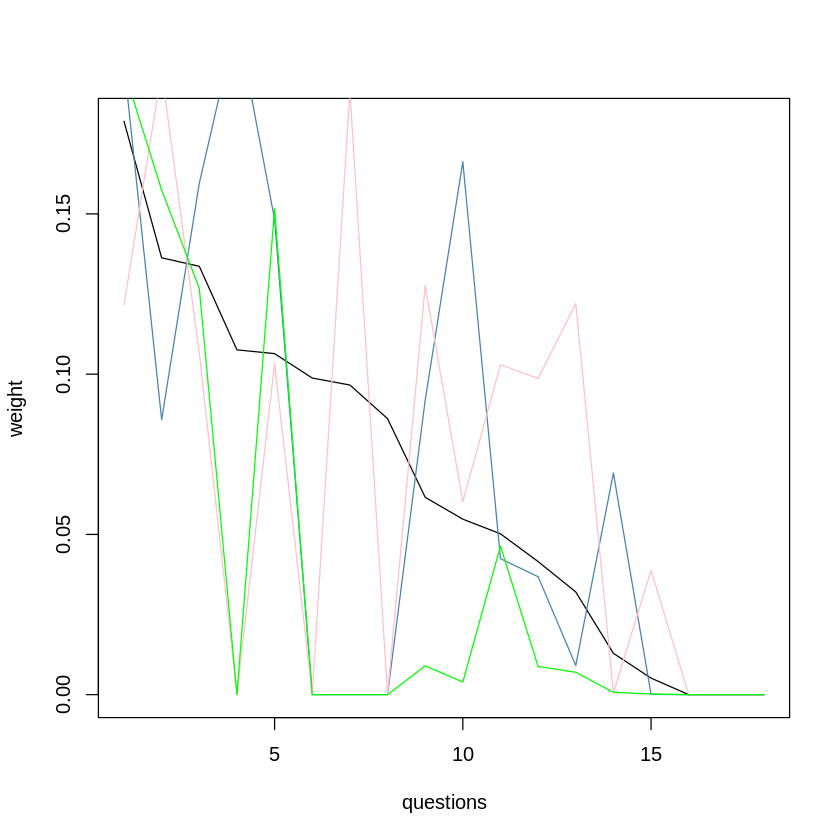

In [16]:
plot(results$total, 
    xlab = "questions",
    ylab = "weight",
    type = "l")
lines(results$"1", col = "steelblue")
lines(results$"2", col = "pink")
lines(results$"3", col = "green")